In [6]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from fenics import *
from mshr import *
from ufl import nabla_grad, nabla_div, grad
%matplotlib notebook


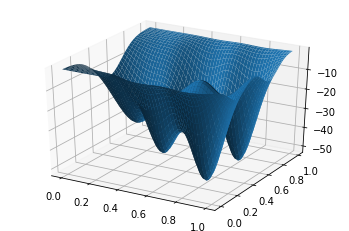

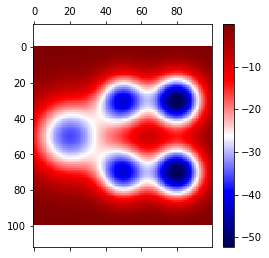

Text(0.5, 1.0, 'Contour plot of solution')

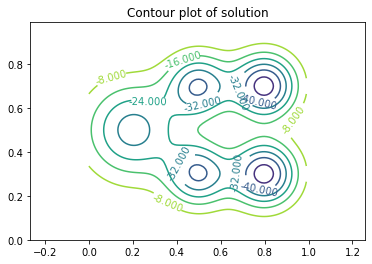

In [12]:
# Artificial Landscape
%matplotlib inline

def fun(x, y, muX,muY, sigma):
    return gaussian2d(x,y, muX, muY, sigma, sigma)

def sqr(x):
    return x*x

def gaussian(x,mu,sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)/sigma)**2)

def gaussian2d(x, y ,muX, muY ,sigmaX, sigmaY):
    return 1/(sigmaX*sigmaY*np.sqrt(2*np.pi)) * np.exp(-0.5*(((x-muX)/sigmaX)**2+((y-muY)/sigmaY)**2))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x =  np.arange(0, 1.0, 1/100)
y = np.arange(0, 1.0, 1/100)
X, Y = np.meshgrid(x, y)
zs = np.array(-fun(np.ravel(X), np.ravel(Y), 0.2, 0.5, 0.15))*2
zs += np.array(-fun(np.ravel(X), np.ravel(Y), 0.5, 0.3, 0.1))
zs += np.array(-fun(np.ravel(X), np.ravel(Y), 0.5, 0.7, 0.1))
zs += np.array(-fun(np.ravel(X), np.ravel(Y), 0.8, 0.3, 0.1))*1.3
zs += np.array(-fun(np.ravel(X), np.ravel(Y), 0.8, 0.7, 0.1))*1.3
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z) 
# ax.plot_surface(X, Y, Z2, linewidth=1) 
# ax.plot_wireframe(X, Y, Z) 
plt.matshow(Z,aspect=1,cmap=plt.get_cmap('seismic'))
plt.colorbar()
plt.axis('equal')
plt.show()
zlog = -np.log(np.abs(zs))

fig = plt.figure()
ax = fig.gca()
# levels = [1.5, 2.0, 2.5, 3.5]
cs = ax.contour(x, y, Z)
plt.clabel(cs)  # add labels to contour lines
plt.axis('equal')
plt.title('Contour plot of solution')
# Z = zlog.reshape(X.shape)
# plt.matshow(Z,aspect=1,cmap=plt.get_cmap('seismic'))
# plt.colorbar()

###Functions and constants

In [18]:
# Functions and constants

# How to apply the fcts to the meshes
# def fun(x, y):
#     return 1+2**x + y/max(x)
# zs = np.array(fun(np.ravel(X), np.ravel(Y)))

# Proliferation rate
def r(x_, y_):
    return 1 + 2**x_

# Differtiation rate
# Needs to be 1d --> np- ravel
def a(x_,y_):
    return 0.5*(1 - x_/max(x_))

# PT/ direction of the differentiation
def c_k(x_, y_):
    return x_**2
#     c_[0] = 0
#     c_[1] = x_**2


nu = 0.01
cDiff = 0.0027
dbar = 1.6925
cS =0.5
# def cDth:
    
    
# logistic growth term
# x and u need to be the same size
def R(x_, y_, u_):
    u_ = np.array(u_)
    cDth = 1./u_
    temp = (1. - cDth*cS)
    temp[temp < dbar] = dbar
    temp *= r(x_, y_)*u_
    return temp

# apoptosis term
def d(x_, u_):
    return min(u_/max(u_), dbar)

# V1: first part of the advection term
def v1(x_, y_):
    return 2*(1-a(x_, y_))*cDiff*r(x_, y_)

# V2: second part of the advection term
def v2(x_, zlog_):
    zlog_ = np.array(zlog_)
    zlog_.reshape(np.prod(zlog_.shape))
    return nu*nabla_div(zlog_)
# not sure if grad or nabla_grad or nabla_div

def V(x_, y_, zlog_):
    zlog_ = np.array(zlog_)
    return v1(x_, y_) + v2(x_, zlog_)

(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)


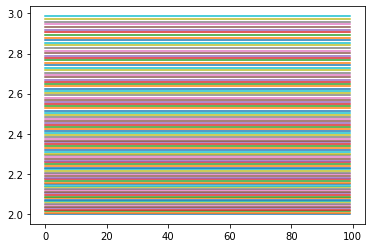

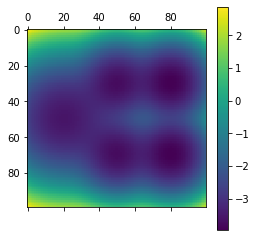

In [19]:
# Calculate the coefficient Matrices
x = np.arange(0, 1.0, 1/100)
y = np.arange(0, 1.0, 1/100)
X, Y = np.meshgrid(x,y)
cRct = r(X,Y)
cRct =cRct.reshape(X.shape)
print(cRct.shape)
plt.plot(cRct)
cAdv = a(np.ravel(X),np.ravel(Y))
cAdvMat = cAdv.reshape(X.shape)
print(cAdvMat.shape)
cA = c_k(X,Y)
# cAMat = cA.reshape(X.shape)
print(cA.shape)

c = np.ones(X.shape)
# u = np.diag(c)
R = R(X, Y, c)
print(R.shape)
# plot(R)

zlog = -np.log(np.abs(zs))
zlog = zlog.reshape(X.shape)
print(zlog.shape)



plt.matshow(zlog)
plt.colorbar()
plt.show()

In [10]:
# Tests
mesh = UnitSquareMesh(100,120) #dx != dy
V = VectorFunctionSpace(mesh, 'P', 2)
c=np.zeros(2)
print(c_k(4,c))
c=np.ones(2)
print(c)
print(r(c,c))
# print(a(c))
print(R(c,0,c))
print(v1(c, c))
print(zs.shape)
zlog = -np.log(np.abs(zs))
print(zlog.shape)

zlog = Constant((zlog))
print(v2(c, zlog))


16
[1. 1.]
[3. 3.]


TypeError: 'numpy.ndarray' object is not callable

# Advection-Diffusion Reaction


T = 5.0
num_steps = 5000
dt = T / num_steps

x =  np.arange(0, 1.0, 1/100)
y = np.arange(0, 1.0, 1/120)
mesh = UnitSquareMesh(100,120) #dx != dy
V = VectorFunctionSpace(mesh, 'P', 2)

u = TrialFunction(V)
v = TestFunction(V)

u_n = Function(V)
u_1 = Function(V)


nu = Constant(nu)
k = Constant(1/dt)
mx = Constant(x)
my = Constant(y)
c=np.ones(100)
Uinit = c
Rv = R(x,y,Uinit)
print(Rv.shape)
# Rv = Constant(Rv)


Rv2 = np.dot(Rv,Uinit)
Rv = Constant(Rv2)F = dot((u - u_n) * k, v) * dx + nu * dot(nabla_div(u), nabla_div(v)) * dx + \
     inner(Rv,v) * dx # + dot(V(x,zlog)*u,nabla_grad(v)) * dx


# Simpler Case
T = 5.0
num_steps = 5000
dt = T / num_steps

x =  np.arange(0, 1.0, 1/100)
y = np.arange(0, 1.0, 1/100)
mesh = UnitSquareMesh(100,100) #dx != dy
V = VectorFunctionSpace(mesh, 'P', 2)

u = TrialFunction(V)
v = TestFunction(V)
u_n = Function(V)
u_1 = Function(V)
print(v)

def boundary(x, on_boundary):
    return on_boundary


zero = Constant((0,0))
bc = DirichletBC(V, zero, boundary)


nu = Constant(nu)
k = Constant(1/dt)
mx = Constant(x)
my = Constant(y)

Uinit = np.ones(X.shape)
Rv = R(X,Y,Uinit)
print(Rv.shape)
# Rv = Constant(Rv)


Rv2 = np.dot(Rv,Uinit)
Rv = Constant(Rv2)
F = dot((u - u_n) * k, v) * dx + nu * dot(nabla_div(u), nabla_div(v)) * dx + \
     inner(Rv,v) * dx # + dot(V(x,zlog)*u,nabla_grad(v)) * dx

u = Function(V)
solve(F == 0, u, bc)


<IPython.core.display.Javascript object>


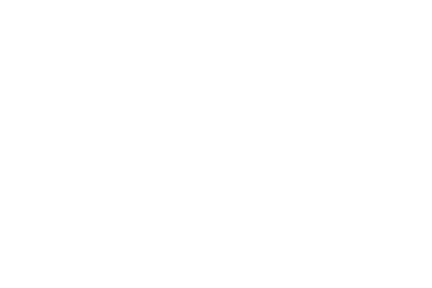

error L2 = 0.008235098073354827
error max 1.3322676295501878e-15


<IPython.core.display.Javascript object>


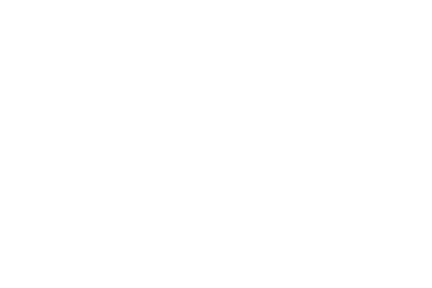

In [20]:
# even simpler case

%matplotlib notebook

def R(x_, y_, u_):
    u_ = np.array(u_)
    cDth = 1./u_
    temp = (1. - cDth*cS)
    temp[temp < dbar] = dbar
    temp *= r(x_, y_)*u_
    return temp


def r(x_, y_):
    return 1 + 2**x_


# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)  # 8X8 rectangles, each divided in 2 triangle, hence 128 cells, and 81 (9^2) vertices
V = FunctionSpace(mesh, 'P', 1)  # P returns Lagrangian polynomials, 1 is the degree of the FE

# Define boundary condition (value)
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)


def boundary(x, on_boundary):
    return on_boundary


zero = Constant(0)
bc = DirichletBC(V, u_D, boundary)

# Define variational problem
uh = TrialFunction(V)  # here it is just defined as an unknown to define a.
vh = TestFunction(V)
f = Constant(-6.0)  # or Expression(’-6’, degree=0)
#a = dot(grad(uh), grad(vh)) * dx  # bilinear form

a = dot(grad(uh), grad(vh)) * dx  # bilinear form

L = f * vh * dx  # linear form

# Compute solution
uh = Function(V) # here we redefine it for the solver
solve(a == L, uh, bc)

# Plot Solution and Mesh
plot(uh,title= 'FE solution')
plot(mesh,title= 'FE mesh')

# save solution --> omit
# vtkfile = File('poisson/solution.pvd')
# vtkfile << uh


# Compute error in L2 norm
errorL2_var = errornorm(u_D, uh, 'L2')

# Compute maximum error at vertices
vertex_values_u_D_var = u_D.compute_vertex_values(mesh)
vertex_values_u_var = uh.compute_vertex_values(mesh)
errorMax_var = np.max(np.abs(vertex_values_u_D_var - vertex_values_u_var))

# print error
print('error L2 =', errorL2_var)
print('error max', errorMax_var)

plt.show()


In [21]:
%matplotlib notebook

mesh = UnitSquareMesh(8, 8)  # 8X8 rectangles, each divided in 2 triangle, hence 128 cells, and 81 (9^2) vertices
Vhat = FunctionSpace(mesh, 'P', 1)  # P returns Lagrangian polynomials, 1 is the degree of the FE
parameters['reorder_dofs_serial'] = False

xmax = 1
c = np.ones(X.shape)
print(X.shape)
uinit = 10*c
cDth = 1./uinit
r = Expression('1 + pow(2, x[0])', degree=2)
a = Expression('0.5 * (1 - x[0]/xmax)', degree=2, xmax= xmax)
c_k = Expression('x[0]*x[0]', degree=2)
# cDth_val = Expression('cDth[x[0],x[1]]', degree=1, cDth= cDth)
zlog = -np.log(np.abs(zs))


cDthFct = Function(Vhat)
cDth = interpMat(X,Y,cDth, mesh)
cDthFct.vector()[:] = cDth
print(cDthFct)


def R(u_):
#     u_ = np.array(u_)
    temp = (1. - cDthFct*u_)
#     temp[temp < dbar] = dbar
    temp *= r*u_
    return temp


def v1():
    return 1
#     return zlog.reshape(X.shape)


def v2(u_):
    return  c_k*(1-a)*R(u_)


def Adv(u_): 
    return v1()*u_ + v2(u_)


def boundary(x, on_boundary):
    return on_boundary


f = Constant(-6.0)  # or Expression(’-6’, degree=0)

zero = Constant(0)
bc = DirichletBC(Vhat, zero, boundary)

u = TrialFunction(Vhat)  # here it is just defined as an unknown to define a.
v = TestFunction(Vhat)
print(R(u))

F = nu * dot(grad(u), grad(v)) * dx  - dot( R(u), v) * dx
# - dot( R(u), v) * dx
# - dot( v2(u), grad(v)) * dx
# - dot( Adv(u), grad(v)) * dx
# - dot( R(u)*u, v) * dx

u = Function(Vhat)
a = lhs(F)
L =  rhs(F)
solve(a==L, u, bc)
plot(u)
# plt.colorbar()
# print(max(u.vector()))



(100, 100)


NameError: name 'interpMat' is not defined

In [22]:
mesh = UnitSquareMesh(16,8)
V = FunctionSpace(mesh,'CG',1)

C1 = Function(V)

class InitialCondition(Expression):
    def eval_cell(self, value, x, ufc_cell):
        if x[0] <= 0.5:
            value[0] = 1.0
        else:
            value[0] = 0.0

C1.interpolate(InitialCondition())
plot(C1, interactive=True)

RuntimeError: Must supply C++ code to Expression. You may want to use UserExpression

(81,)


<IPython.core.display.Javascript object>


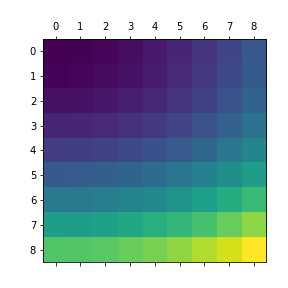

<IPython.core.display.Javascript object>


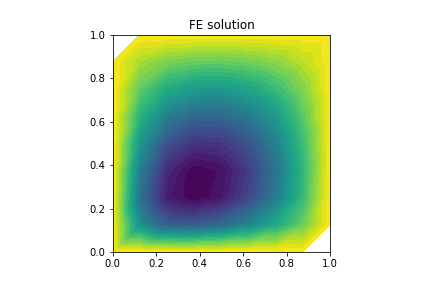

In [23]:
mesh = UnitSquareMesh(8, 8)  # 8X8 rectangles, each divided in 2 triangle, hence 128 cells, and 81 (9^2) vertices
V = FunctionSpace(mesh, 'P', 1)  # P returns Lagrangian polynomials, 1 is the degree of the FE

# u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)
u = Function(V)

nu = Expression('1 + 3*x[0]*x[0] + 8*x[1]*x[1]', degree=2)
u_nu = interpolate(nu, V)

nuMat = u_nu.vector().get_local()
print(nuMat.shape)
u.vector()[:] = nuMat
nuMat = nuMat.reshape(9,9)
plt.matshow(nuMat)
# from scipy import interpolate 
#  = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

# grid_z0 = griddata((x,y), nuMat, (grid_x, grid_y), method='cubic')


# print(nuMat)
def boundary(x, on_boundary):
    return on_boundary


zero = Constant(0)
bc = DirichletBC(V, zero, boundary)

uh = TrialFunction(V)  # here it is just defined as an unknown to define a.
vh = TestFunction(V)
f = Constant(-6.0)  # or Expression(’-6’, degree=0)

a = u * dot(grad(uh), grad(vh)) * dx  # bilinear form

L = f * vh * dx  # linear form

# Compute solution
uh = Function(V) # here we redefine it for the solver
solve(a == L, uh, bc)

# Plot Solution and Mesh
plt.figure()
plot(uh,title= 'FE solution')
# plot(mesh,title= 'FE mesh')



In [ ]:
mesh = UnitSquareMesh(20, 20)  # 8X8 rectangles, each divided in 2 triangle, hence 128 cells, and 81 (9^2) vertices
V = FunctionSpace(mesh, 'P', 1)  # P returns Lagrangian polynomials, 1 is the degree of the FE
parameters['reorder_dofs_serial'] = False

# u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)
u = Function(V)

nu = Expression('1 + 3*x[0]*x[0] + 8*x[1]*x[1]', degree=2)
u_nu = interpolate(nu, V)

nuMat = u_nu.vector().get_local()
# print(nuMat.shape)
u.vector()[:] = nuMat
# print(u.vector().get_local().shape)

points = np.concatenate((X,Y))
# print(points.shape)
points = points.reshape(np.prod(X.shape), 2)
# print(points.shape)


# print(zlog)
print(zlog.shape)
# plt.matshow(zlog)


cDth = zlog
cDth = cDth.reshape(np.prod(cDth.shape))
print(cDth.shape)
# plt.matshow(zlog)
# print(cDth.shape)
# cDthMat = nu.vector().get_local()
cDthMat = Function(V)
from scipy.interpolate import griddata, interp2d
xx = np.arange(0, 1.0, 1/21)
yy = np.arange(0, 1.0, 1/21)
x = np.arange(0, 1.0, 1/100)
y = np.arange(0, 1.0, 1/100)
f = interp2d(x,y,cDth)
cDth= f(xx,yy)
# cDth = griddata(points, cDth, (coor[:,0], coor[:,1]), method='linear')
# print(coor.shape)
# print(cDth.shape)

# print(cDth)
# print(cDth.reshape(9,9))

cDth = cDth.T
print(cDth.shape)


# plt.matshow(cDth)
# plot(coor[:,0], coor[:,1], )
# .reshape(np.prod(cDth.shape))
cDth = cDth.reshape(np.prod(cDth.shape))
print(cDth.shape)
cDthMat.vector()[:] = cDth
plt.figure()
plot(cDthMat)
# print(cDth[:,1])
def interpMat(N, M, mat):
    xx = np.arange(0, 1.0, 1/(N+1))
    yy = np.arange(0, 1.0, 1/(N+1))
    x = np.arange(0, 1.0, 1/M)
    y = np.arange(0, 1.0, 1/M)
    f = interp2d(x,y,mat)
    mat = f(xx,yy)
    mat = mat.T
    mat = mat.reshape(np.prod(mat.shape))
    return mat

In [ ]:
c = np.ones(X.shape)
print(X.shape)
uinit = 10*c
cDth = 1./uinit
cDth = zlog
cDth = cDth.reshape(np.prod(cDth.shape))
print(zlog.shape)
# plt.matshow(zlog)

cDthFct = Function(V)
cDth = interpMat(20,100, cDth)

cDthMat.vector()[:] = cDth
plt.figure()
# print(cDthMat.vector())
plot(cDthMat)
print(cDth.shape)


In [ ]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2
points = np.random.rand(1000, 2)
print(points.shape)
values = func(points[:,0], points[:,1])
print(values.shape)
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
print(grid_y.shape)
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
print(grid_z0.shape)
import matplotlib.pyplot as plt
# plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.imshow(grid_z0.T,  extent=(0,1,0,1), origin='lower')
# plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')